In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

In [2]:
# Load NHL dataset
df = pd.read_csv('merged_with_event_features.csv')

# Drop duplicates based on game_id and team_id
df = df.drop_duplicates(subset=['game_id', 'team_id'])

# Show missing values
print(df[df.isna().any(axis=1)])
df.info()

              play_id     game_id  team_id_for_x  team_id_against  \
0        2016020045_1  2016020045            NaN              NaN   
1        2016020045_1  2016020045            NaN              NaN   
598     2016020610_62  2016020610            NaN              NaN   
599     2016020610_62  2016020610            NaN              NaN   
1266   2016020298_157  2016020298            NaN              NaN   
...               ...         ...            ...              ...   
34009  2016020306_254  2016020306            NaN              NaN   
36266  2016020991_153  2016020991            NaN              NaN   
36267  2016020991_153  2016020991            NaN              NaN   
36524  2016020843_251  2016020843            NaN              NaN   
36525  2016020843_251  2016020843            NaN              NaN   

                event secondaryType   x   y  team_id   HoA  ...  \
0      Game Scheduled           NaN NaN NaN        4  away  ...   
1      Game Scheduled           NaN N

In [ ]:

df['is_home'] = df['HoA'].map({'home': 1, 'away': 0})

# Define feature list
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
            'giveaways', 'takeaways', 'blocked', 'avg_shot_x', 'avg_shot_y',
            'close_range', 'num_slap_shot', 'num_wrist_shot', 'won', 'num_backhand','num_slap_shot','num_tip-in', 'is_home']

df = df[features]
df_num = df.select_dtypes(exclude='object')
df_obj = df.select_dtypes(include='object')

df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 36525
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shots                  128 non-null    float64
 1   hits                   128 non-null    float64
 2   pim                    128 non-null    float64
 3   powerPlayGoals         128 non-null    float64
 4   faceOffWinPercentage   128 non-null    float64
 5   giveaways              128 non-null    float64
 6   takeaways              128 non-null    float64
 7   blocked                128 non-null    float64
 8   avg_shot_x             114 non-null    float64
 9   avg_shot_y             114 non-null    float64
 10  num_close_range_shots  114 non-null    float64
 11  num_slap_shot          114 non-null    float64
 12  num_wrist_shot         114 non-null    float64
 13  won                    128 non-null    bool   
dtypes: bool(1), float64(13)
memory usage: 14.1 KB
<class 'pandas.

In [4]:
# Drop NA values and check class distribution
df = df.dropna()
df['won'] = df['won'].astype(int)
df['won'].value_counts()

won
0    57
1    57
Name: count, dtype: int64

In [5]:
# Define attributes and target, split data
X = df.drop('won', axis=1)
y = df['won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

In [7]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5217391304347826
Confusion Matrix:
[[7 5]
 [6 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.50      0.45      0.48        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.52      0.52      0.52        23



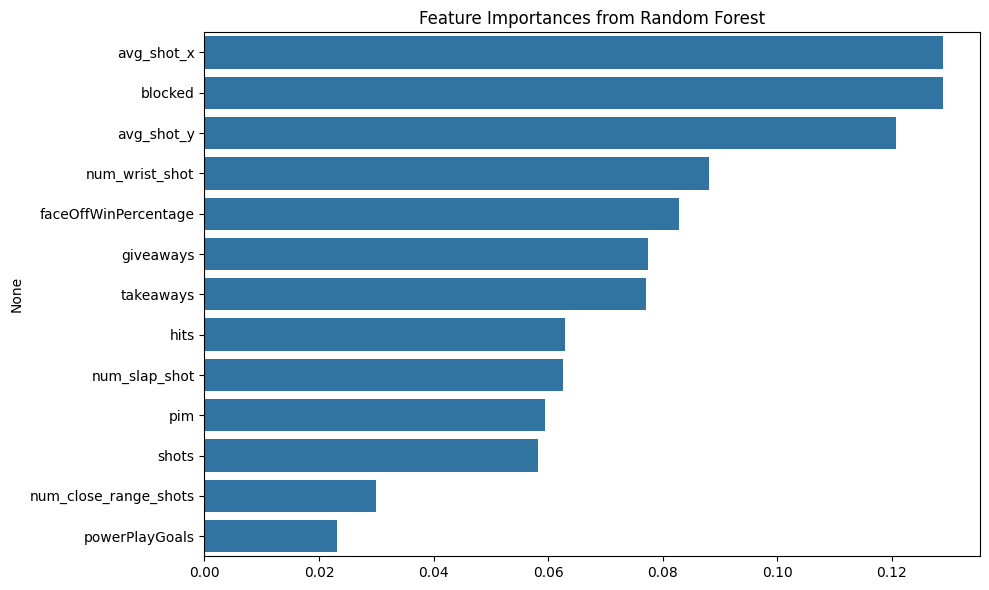

In [8]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()